Original dataset shape: Counter({0: 284315, 1: 492})
Resampled dataset shape: Counter({0: 199008, 1: 199008})


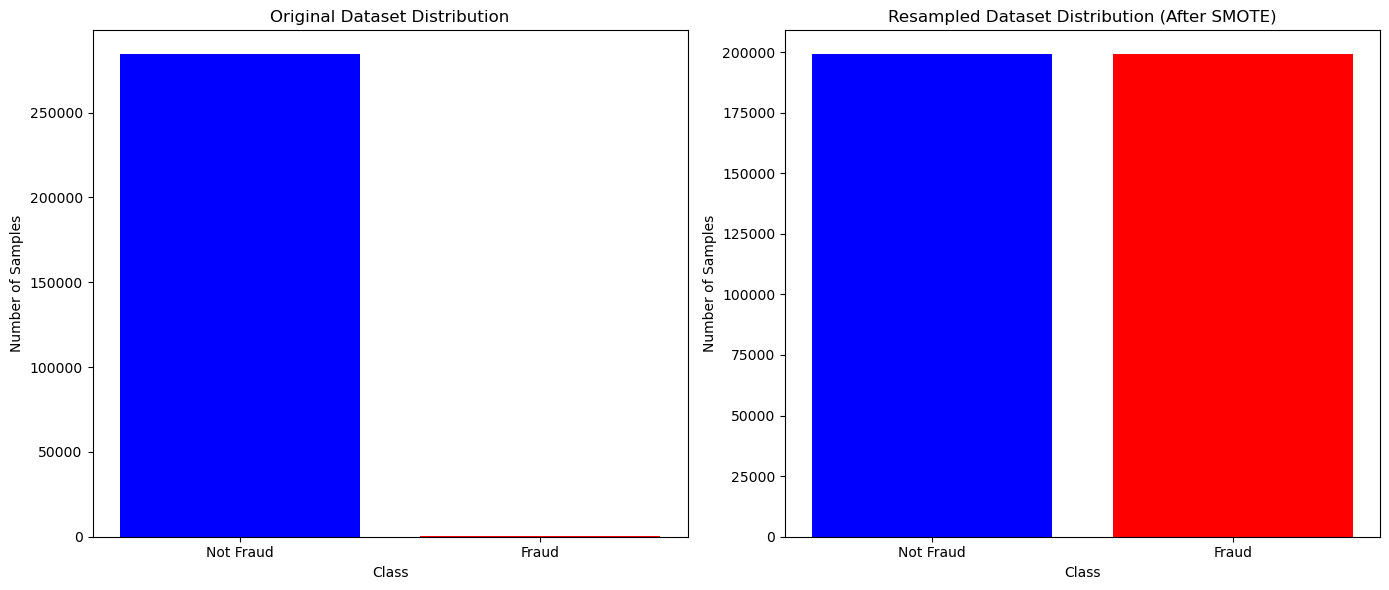

In [4]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

# Load your dataset (assuming the CSV file is already available in the working directory)
df = pd.read_csv('creditcard.csv')

# Separate features and target variable
X = df.drop('Class', axis=1)  # Assuming 'Class' is the target column
y = df['Class']

# Print original class distribution
print(f'Original dataset shape: {Counter(y)}')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

# Print the resampled class distribution
print(f'Resampled dataset shape: {Counter(y_res)}')

# Plot original and resampled class distribution
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Original dataset
original_counts = Counter(y)
ax[0].bar(original_counts.keys(), original_counts.values(), color=['blue', 'red'])
ax[0].set_title('Original Dataset Distribution')
ax[0].set_xlabel('Class')
ax[0].set_ylabel('Number of Samples')
ax[0].set_xticks([0, 1])
ax[0].set_xticklabels(['Not Fraud', 'Fraud'])

# Resampled dataset
resampled_counts = Counter(y_res)
ax[1].bar(resampled_counts.keys(), resampled_counts.values(), color=['blue', 'red'])
ax[1].set_title('Resampled Dataset Distribution (After SMOTE)')
ax[1].set_xlabel('Class')
ax[1].set_ylabel('Number of Samples')
ax[1].set_xticks([0, 1])
ax[1].set_xticklabels(['Not Fraud', 'Fraud'])

plt.tight_layout()
plt.show()


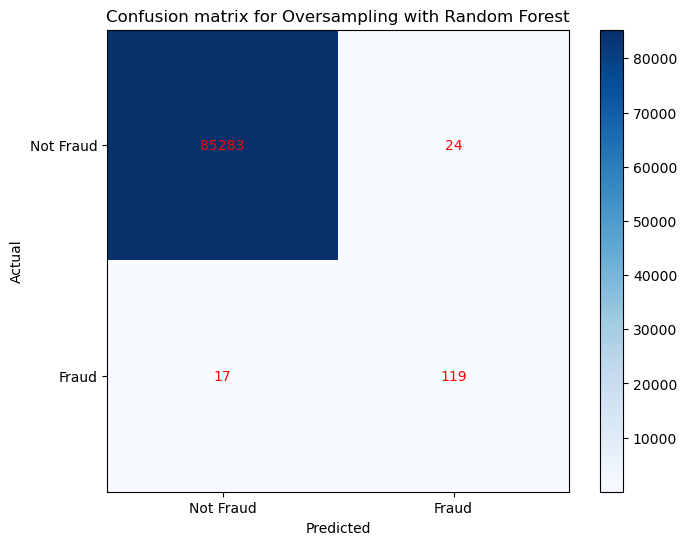

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.83      0.88      0.85       136

    accuracy                           1.00     85443
   macro avg       0.92      0.94      0.93     85443
weighted avg       1.00      1.00      1.00     85443



In [3]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np  # Import numpy for np.arange

# Load your dataset (assuming the CSV file is already available in the working directory)
df = pd.read_csv('creditcard.csv')

# Separate features and target variable
X = df.drop('Class', axis=1)  # Assuming 'Class' is the target column
y = df['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

# Train a RandomForest model on the resampled data
model = RandomForestClassifier(random_state=42)
model.fit(X_res, y_res)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Create the Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using Matplotlib
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.colorbar()

# Add labels
plt.xticks(np.arange(2), ['Not Fraud', 'Fraud'])
plt.yticks(np.arange(2), ['Not Fraud', 'Fraud'])

# Add title and labels
plt.title('Confusion matrix for Oversampling with Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Add values in the matrix
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, conf_matrix[i, j], ha='center', va='center', color='red')

plt.show()

# Print classification report for additional metrics
print(classification_report(y_test, y_pred))


In [5]:
# استخراج القيم من مصفوفة الالتباس
TP = conf_matrix[1, 1]  # True Positives
TN = conf_matrix[0, 0]  # True Negatives
FP = conf_matrix[0, 1]  # False Positives
FN = conf_matrix[1, 0]  # False Negatives

# حساب المقاييس
accuracy = (TP + TN) / (TP + TN + FP + FN)
recall = TP / (TP + FN)
precision = TP / (TP + FP)
specificity = TN / (TN + FP)
f1_score = 2 * (precision * recall) / (precision + recall)

# طباعة المقاييس
print(f'Accuracy: {accuracy:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Specificity: {specificity:.4f}')
print(f'F1 Score: {f1_score:.4f}')


Accuracy: 0.9995
Recall: 0.8750
Precision: 0.8322
Specificity: 0.9997
F1 Score: 0.8530
